# How to use the algorithm Orthogonal Matching Pursuit - OMP on a DataTime object

The SciDataTool python module has been created to **ease the handling of scientific data**, the DataND method `orthogonal_mp` allows to recover a signal with missing time samples assuming the signal has a sparse representation in the Fourier space, which means the signal is compressible.

Given a DataTime object, build upon a non uniform axe Data1D, we want to compute the spectrum of the DataTime object.

There are 2 different way to implement this reconstruction:
1. Greedy algorithm -> OMP
2. Linear system with $l_1$ constraint -> Basis Pursuit

This implementation uses the greedy function `sklearn.linear_model.orthogonal_mp` from the package `scikit-learn`. The glossary and the formalism used in `scikit-learn` is closed from the machine learning / statistics ones, so the documentation can be quite different from the usual formalism used in signal processing, a greedy algorthm is called a forward feature selection.

The dictionary used is a concatenation of the DCT - Discrete Cosinus Transform - matrix and of the DST - Discrete Sinus Transform - matrix.

The following explains how to use `DataND.orthogonal_mp` method.


### Decomposition

The use of the DCT and DST matrix is relevant for the following decomposition of the signal $x$:
$$
\begin{equation}
x(t) = \sum_k c_k e^{i 2 \pi f_k t}
\end{equation}
$$
$c_k = |c_k| e^{i \phi_k}$ is the complex coefficients of the $f_k$ frequency.

For a real signal:
$$
\begin{equation}
x(t) = \sum_k |c_k| \cos(\phi_k) cos(2 \pi f_k t) + \sum_k -|c_k| \sin(\phi_k) \sin(2 \pi f_k t)
\end{equation}
$$


In [37]:
from SciDataTool.Classes.DataTime import DataTime
from SciDataTool.Classes.Data1D import Data1D
from SciDataTool.Classes.DataND import DataND

from SciDataTool.Functions.omp import comp_DST

import numpy as np

from math import floor

In [38]:
import scipy.fft as spfft

from sklearn.linear_model import orthogonal_mp

#### Example:
Create a signal of $2$ sinudoids with $n=100$ points, it's then undersampled with only $K=30$% of the grid.

We plot the $2$ signals and the spectrum.

In [47]:
n = 100

t = np.linspace(0,1,n,endpoint=False)

# Create a undersampled time vector with 30% of the initial samples
K = 0.2
m = floor(K*n)
M = np.random.choice(n,m, replace=False)
M.sort()

signal = np.cos(2*np.pi*4*t+0.2) + 0.5*np.cos(2*np.pi*10*t+2)
signal_under = signal[M]

Time = Data1D(name="time", unit="s", values=t)
Time_under = Data1D(name="time", unit="s", values=t[M])

Signal = DataTime(
    name="Full signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=signal,
    is_real=True,
)

Signal_under = DataTime(
    name="Undersampled",
    symbol="B_r",
    unit="dimless",
    axes=[Time_under],
    values=signal_under,
    is_real=True,
)

c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


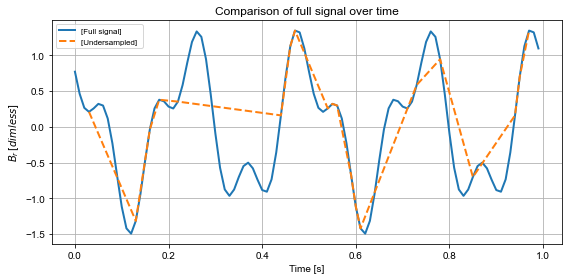

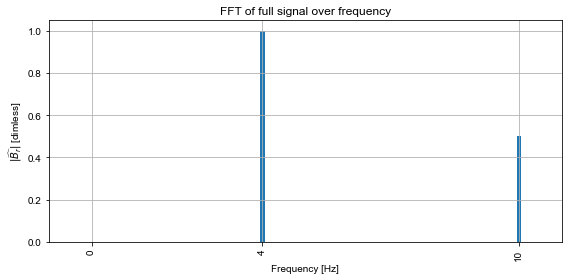

In [48]:
Signal.plot_2D_Data("time",data_list=[Signal_under],linestyles=["-","--"])

Signal.plot_2D_Data("freqs")

### Recover of the full signal:

c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[ 3.14159265  0.28306426 -1.32799116  1.58868823  0.2         0.6646285
  0.64965654 -2.81615471 -1.00330416 -1.43610672  2.         -2.7065731
 -0.67002747  0.7391009  -1.36790858  0.78539816  1.96783567  0.35534684
  1.003511    1.53512081  2.03657602  3.01723766  1.35366727  2.48518312
 -2.36033748  1.69022525  2.8368883   3.10679959 -1.57923797 -0.12435499
 -1.65513368 -0.44953458  0.87037567  2.68870913  0.08879334  0.5880026
  1.99375655  3.04290874 -0.35212386  2.28875841  3.14159265  2.95330921
  1.9700595  -2.93678084 -0.74604385  1.55337477  0.24497866  2.43617661
 -2.80110956 -1.27298286  0.        ]
[ 3.14159265 -0.87734759  2.8307351   2.71434902  0.12566371 -1.50685499
 -0.16843486 -2.67637967  3.05548091 -1.06734721  1.57079633  0.77549337
  1.35880651  2.46356308 -2.43919684  1.82533514 -2.67379637 -3.13758077
 -2.6573318  -2.22952238 -1.78228649 -0.38970857 -0.09444133  0.24673543
 -2.93972642 -1.43996893  0.23356433  0.031018    2.29368529 -1.37809557
 -0.2657953   2.

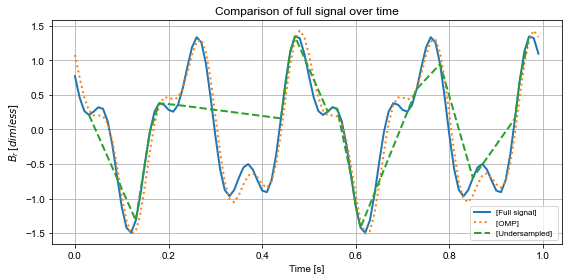

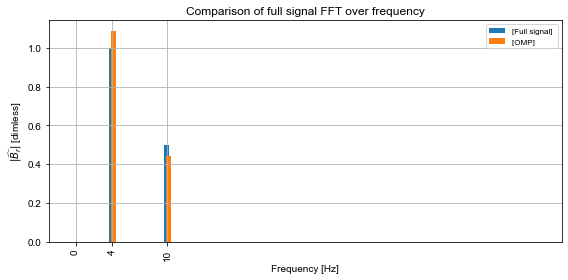

In [57]:
Signal_recover = Signal_under.orthogonal_mp(Time,n_coefs=2)
Signal_recover.name = "OMP"

Signal.plot_2D_Data("time",data_list=[Signal_recover,Signal_under],linestyles=["-",":","--"])
Signal.plot_2D_Data("freqs",data_list=[Signal_recover],is_auto_range=False)

phase = np.angle(Signal.get_along("freqs")['B_r'])
phase_recover = np.angle(Signal_recover.get_along("freqs")['B_r'])

print(phase)
print(phase_recover)

In this example, the `orthogonal_mp` method is used to recover a signal, sum of $2$ cosinus. Using only $2$ atoms the signal is approximately recovered 

# The dictionary - DCT and DST

Change `i` in order to plot the atoms of the dictionary on which the signal is projected.

(100, 100)


c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


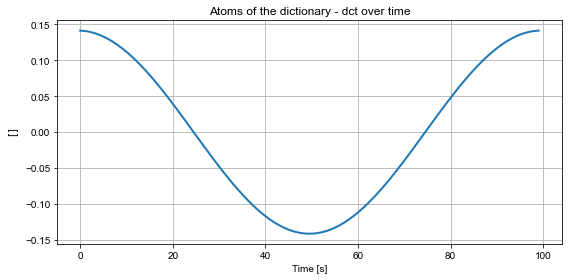

In [58]:
# Compute the dictionary's matrix of the DCT
DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)

# Plot the i-th column of A -> the i-th atom of the dictionary
i = 2

print(DCT.shape)

axe_time = Data1D(
    name="time",
    values=np.asarray([i for i in range(n)]),
    )

atom = DataTime(
    name="Atoms of the Dictionary - DCT",
    axes=[axe_time],
    values=DCT[:,i],
    )

atom.plot_2D_Data("time")

We will use a dictionary which is the concatenation of the DCT's matrix and the DST's matrix

(100, 100)


c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


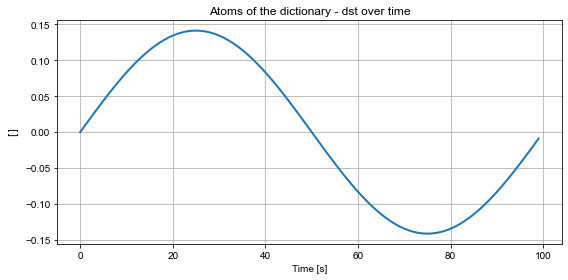

In [59]:
# Compute the dictionary's matrix of the DST
f = 0.5 * np.arange(n)
t = np.linspace(0,1,n,endpoint=False)
DST = np.sin(2 * np.pi * np.outer(f,t))

# Norm the columns of the dictionary
DST = 2 * (1/np.sqrt(2*n)) * DST

# Plot the i-th column of A -> the i-th atom of the dictionary
i = 2

print(DST.shape)

axe_time = Data1D(
    name="time",
    values=np.asarray([i for i in range(n)]),
    )

atom = DataTime(
    name="Atoms of the Dictionary - DST",
    axes=[axe_time],values=DST[:,i],
    )

atom.plot_2D_Data("time")

In [16]:
DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)

f = 0.5 * np.arange(n)
t = np.linspace(0,1,n,endpoint=False)
DST = np.sin(2 * np.pi * np.outer(f,t))

# Norm the columns of the dictionary
DST = 2 * (1/np.sqrt(2*n)) * DST

dictionary = np.concatenate([DCT,DST],axis=1)

print(dictionary.shape)

# a signal of 100 samples is decomposed with a set of cosinus and sinus

(100, 200)


This method recover a time domain signal using its sparse frequency domain representation. Therefore this method uses DST - DCT matrix and process a `DataTime` object.

Those could be change for different future uses.

# Orthogonal Matching Pursuit for SMV - Single Measurement Vector

OMP is a way to solve the following underdetermined linear system:

$$ y = Ax $$

where $A \in R^{m,n}$, $y \in R^m$, $x \in R^n$ and $m << n $
$A$ is the random matrix which models the undersampling.

Assuming the signal has a sparse Fourier Representation, $D$ is the matrix doing the DFT transformation has stated in the last cell.

$$ y = ADX $$

The OMP solve this system minimizing the non zero coefficients of the vector $x$.

The variable `n_coefs` is the number of non zero coefficients searched during the recovering. If set to `None`, `scikit-learn`look for $\frac{10}{m}$ non zero coefficients.

## Different Dictionaries:

The following implement the OMP with 3 different dictionaries:

1. DCT
2. DCT and Identity
3. DCT and DST

In [24]:
n_coefs = 30

def omp(signal_under,M,n,n_coefs=None):
    """OMP with only the DCT matrix"""

    DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)
    DCT = DCT[M]

    decomposition = orthogonal_mp(X=DCT,y=signal_under,n_nonzero_coefs=n_coefs)

    DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)

    signal = DCT @ decomposition

    return decomposition, signal

def omp_indentity(signal_under,M,n,n_coefs=None):
    """OMP with the DCT matrix and the Identity matrix"""

    DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)
    DCT = DCT[M]
    Dictionary = np.concatenate([DCT,np.identity(n)[M]],axis=1)

    decomposition = orthogonal_mp(X=Dictionary,y=signal_under,n_nonzero_coefs=n_coefs)

    DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)
    Dictionary = np.concatenate([DCT,np.identity(n)],axis=1)

    signal = Dictionary @ decomposition

    return decomposition, signal

def omp_dst(signal_under,M,n,n_coefs=None):
    """OMP with the DCT matrix and DST matrix"""

    DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)
    DCT = DCT[M]
    
    f = 0.5 * np.arange(n)
    t = np.linspace(0,1,n,endpoint=False)

    DST = 2 * np.sin(2 * np.pi * np.outer(f,t))
    DST = (1/np.sqrt(2*n)) * DST
    DST = DST[M]
    DST = DST[:,1:]

    Dictionary = np.concatenate([DCT,DST],axis=1)

    decomposition = orthogonal_mp(X=Dictionary,y=signal_under,n_nonzero_coefs=n_coefs)

    DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)
    DST = 2 * np.sin(2 * np.pi * np.outer(f,t))
    DST = (1/np.sqrt(2*n)) * DST
    DST = DST[:,1:]

    Dictionary = np.concatenate([DCT,DST],axis=1)

    signal = Dictionary @ decomposition

    return decomposition, signal


decomposition,signal_reconstruit = omp(signal_under,M,n,n_coefs=n_coefs)

decomposition_identity, signal_reconstruit_identity = omp_indentity(signal_under,M,n,n_coefs=n_coefs)

decomposition_dst, signal_reconstruit_dst = omp_dst(signal_under,M,n,n_coefs=n_coefs)


C:\Users\Eomys\Documents\eomys\repo\virtual_env\sample\lib\site-packages\sklearn\linear_model\_omp.py:389: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  out = _cholesky_omp(
C:\Users\Eomys\Documents\eomys\repo\virtual_env\sample\lib\site-packages\sklearn\linear_model\_omp.py:389: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  out = _cholesky_omp(
C:\Users\Eomys\Documents\eomys\repo\virtual_env\sample\lib\site-packages\sklearn\linear_model\_omp.py:389: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  out = _cholesky_omp(


c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


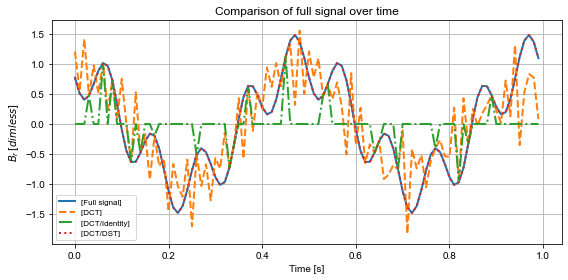

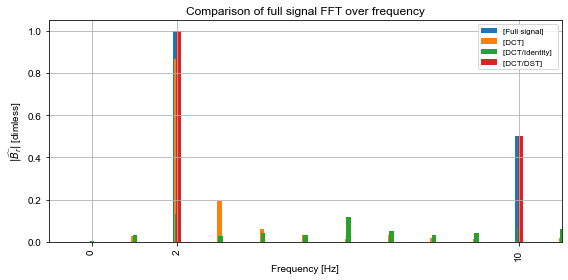

In [25]:
Signal_reconstruit = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=signal_reconstruit,
    is_real=True,
)

Signal_reconstruit_identity = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=signal_reconstruit_identity,
    is_real=True,
)

Signal_reconstruit_dst = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=signal_reconstruit_dst,
    is_real=True,
)

Signal.plot_2D_Data(
    "time",
    data_list=[Signal_reconstruit,Signal_reconstruit_identity,Signal_reconstruit_dst],
    legend_list=["Full signal","DCT","DCT/Identity","DCT/DST"],
    linestyles=["-","--","-.",":"],
    )
Signal.plot_2D_Data(
    "freqs",
    data_list=[Signal_reconstruit,Signal_reconstruit_identity,Signal_reconstruit_dst],
    legend_list=["Full signal","DCT","DCT/Identity","DCT/DST"],
    )


c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


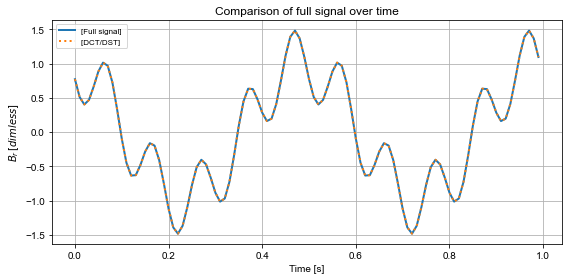

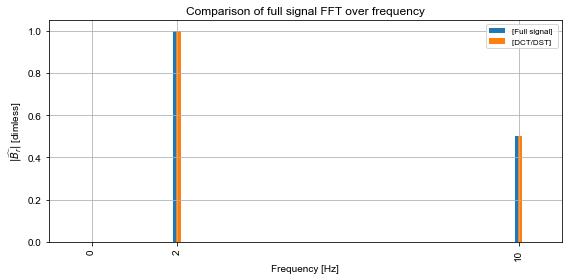

In [26]:
Signal.plot_2D_Data(
    "time",
    data_list=[Signal_reconstruit_dst],
    legend_list=["Full signal","DCT/DST"],
    linestyles=["-",":"],
    )
Signal.plot_2D_Data(
    "freqs",
    data_list=[Signal_reconstruit_dst],
    legend_list=["Full signal","DCT/DST"],
    )

# Orthogonal Matching Pursuit for MMV - Multiple Measurement Vector

Assume we have $\forall i \in \{1,\cdots,n_{targets}\}$

$$ y_i = Ax_i $$

where the $x_i$ vectors are jointly sparse.

We can recover these signals in one use of the OMP, by stacking the vectors $x_i$ and $y_i$ in the columns of the matrix $X$ and $Y$.

$$ Y = AX $$

This can be used to recover 2D signal, for example a time-angle signal.

c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


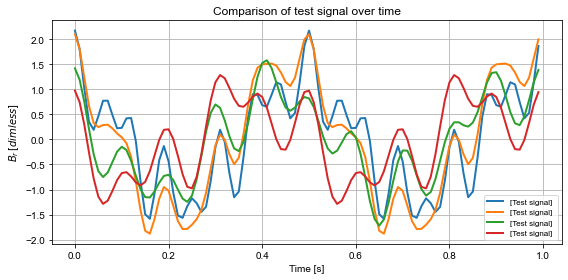

In [32]:
n = 100

t = np.linspace(0,1,n,endpoint=False)

K = 0.28
m = floor(K*n)
M = np.random.choice(n,m, replace=False)
M.sort()

signal_1 = 1.2 * np.cos(2*np.pi*2*t+0.2) + 0.5*np.cos(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*16*t)
signal_2 = 1.6 * np.cos(2*np.pi*2*t+0.5) + 0.5*np.cos(2*np.pi*10*t) + 0.2*np.cos(2*np.pi*16*t)
signal_3 = 1.0 * np.cos(2*np.pi*2*t+0.9) + 0.5*np.cos(2*np.pi*10*t) + 0.3*np.cos(2*np.pi*7*t)
signal_4 = 0.8 * np.cos(2*np.pi*2*t+1.6) + 0.5*np.cos(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*6*t)

signal_under_1 = signal_1[M]
signal_under_2 = signal_2[M]
signal_under_3 = signal_3[M]
signal_under_4 = signal_4[M]

Time = Data1D(name="time", unit="s", values=t)
Time_under = Data1D(name="time", unit="s", values=t[M])

Signal_1 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=signal_1,
    is_real=True,
)

Signal_2 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=signal_2,
    is_real=True,
)

Signal_3 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=signal_3,
    is_real=True,
)

Signal_4 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=signal_4,
    is_real=True,
)

Signal_under_1 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time_under],
    values=signal_under_1,
    is_real=True,
)

Signal_under_2 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time_under],
    values=signal_under_2,
    is_real=True,
)

Signal_under_3 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time_under],
    values=signal_under_3,
    is_real=True,
)

Signal_under_4 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time_under],
    values=signal_under_4,
    is_real=True,
)

Signal_1.plot_2D_Data("time",data_list=[Signal_2,Signal_3,Signal_4])

## Post-Processing
stack the signals in the columns of a matrix `signal_under_mmv`

In [33]:
signal_under_1 = signal_under_1.reshape(-1,1)
signal_under_2 = signal_under_2.reshape(-1,1)
signal_under_3 = signal_under_3.reshape(-1,1)
signal_under_4 = signal_under_4.reshape(-1,1)

print(signal_under_1.shape)

signal_under_mmv = np.concatenate([signal_under_1,signal_under_2,signal_under_3,signal_under_4],axis=1)

print(signal_under_mmv.shape)

decomposition_dst, signal_reconstruit_dst = omp_dst(signal_under_mmv,M,n,n_coefs=n_coefs)

print(decomposition_dst.shape)
print(signal_reconstruit_dst.shape)

s1 = signal_reconstruit_dst[:,0]
s2 = signal_reconstruit_dst[:,1]
s3 = signal_reconstruit_dst[:,2]
s4 = signal_reconstruit_dst[:,3]

(28, 1)
(28, 4)
(199, 4)
(100, 4)


C:\Users\Eomys\Documents\eomys\repo\virtual_env\sample\lib\site-packages\sklearn\linear_model\_omp.py:389: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  out = _cholesky_omp(


c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, whic

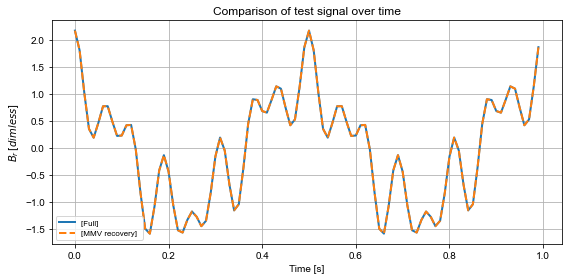

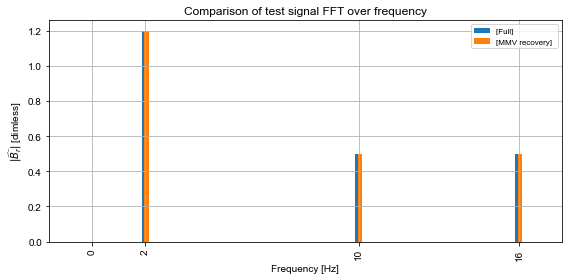

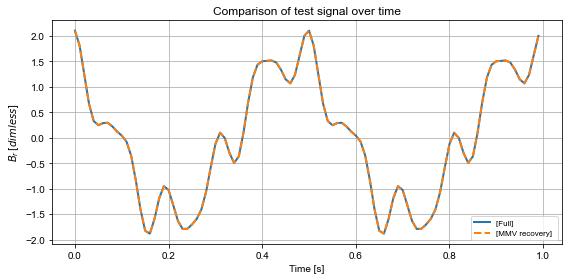

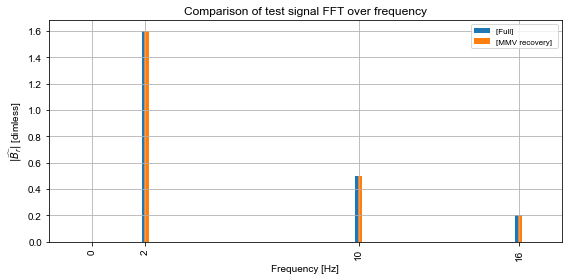

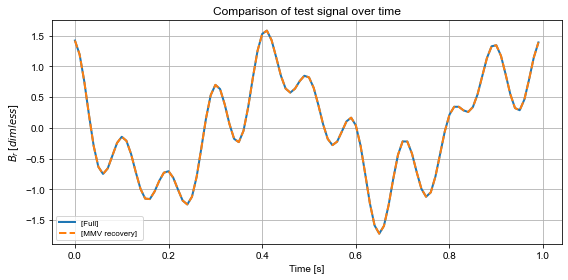

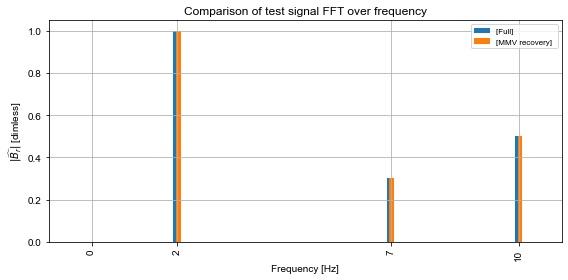

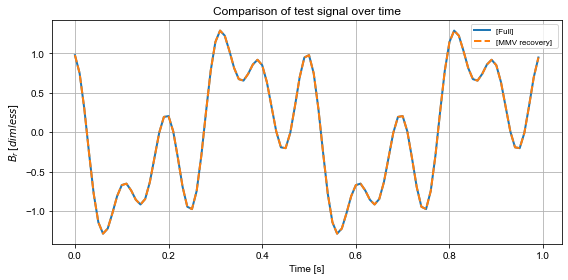

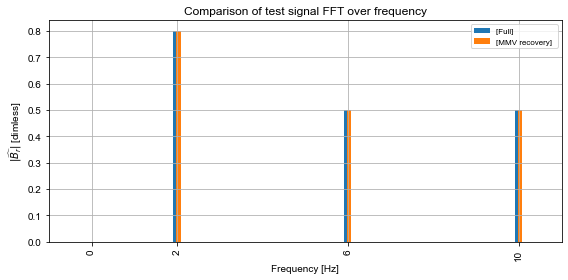

In [34]:
Signal_reconstruit_1 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=s1,
    is_real=True,
)

Signal_reconstruit_2 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=s2,
    is_real=True,
)

Signal_reconstruit_3 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=s3,
    is_real=True,
)

Signal_reconstruit_4 = DataTime(
    name="Test signal",
    symbol="B_r",
    unit="dimless",
    axes=[Time],
    values=s4,
    is_real=True,
)

Signal_1.plot_2D_Data("time",data_list=[Signal_reconstruit_1],legend_list=["Full","MMV recovery"],linestyles=["-","--"])
Signal_1.plot_2D_Data("freqs",data_list=[Signal_reconstruit_1],legend_list=["Full","MMV recovery"],linestyles=["-","--"])

Signal_2.plot_2D_Data("time",data_list=[Signal_reconstruit_2],legend_list=["Full","MMV recovery"],linestyles=["-","--"])
Signal_2.plot_2D_Data("freqs",data_list=[Signal_reconstruit_2],legend_list=["Full","MMV recovery"],linestyles=["-","--"])

Signal_3.plot_2D_Data("time",data_list=[Signal_reconstruit_3],legend_list=["Full","MMV recovery"],linestyles=["-","--"])
Signal_3.plot_2D_Data("freqs",data_list=[Signal_reconstruit_3],legend_list=["Full","MMV recovery"],linestyles=["-","--"])

Signal_4.plot_2D_Data("time",data_list=[Signal_reconstruit_4],legend_list=["Full","MMV recovery"],linestyles=["-","--"])
Signal_4.plot_2D_Data("freqs",data_list=[Signal_reconstruit_4],legend_list=["Full","MMV recovery"],linestyles=["-","--"])


c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_3D.py:318: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_3D.py:318: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_4D.py:249: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, whic

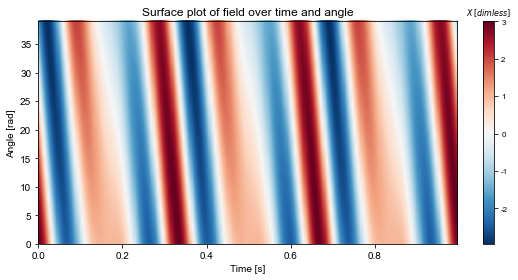

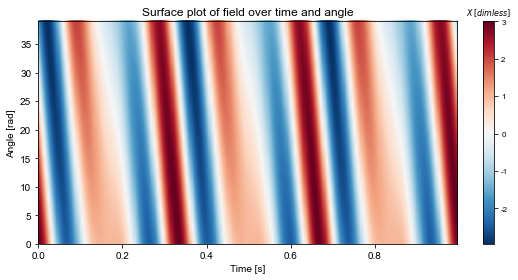

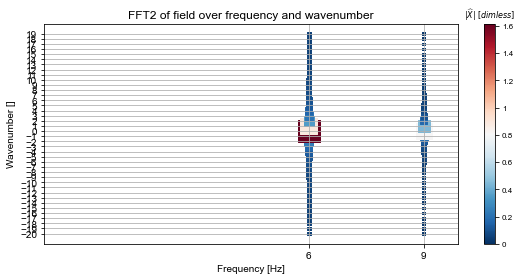

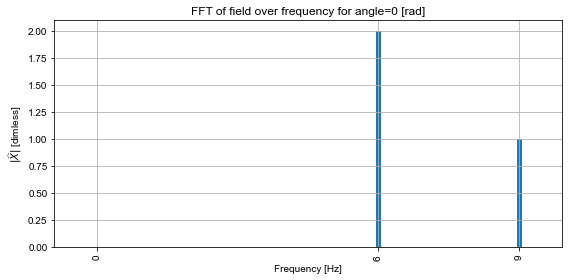

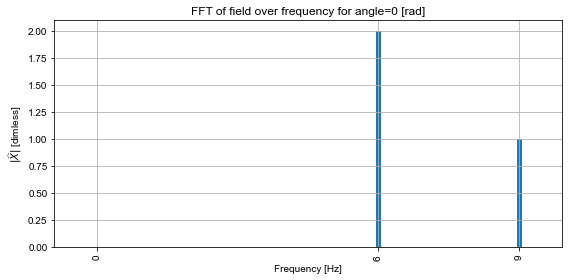

In [35]:
from numpy import ndarray, sin, pi, linspace, meshgrid, cos
    
def f_2d(theta: ndarray, t: ndarray) -> ndarray:
    """
    Create a 2D function with the following Fourier transform coefficients:
    - 2 at 0 Hz
    - 3 at 5 Hz
    - 4 at 12 Hz
    - 1 at 20 Hz
    Wavenumber:
    - 1 at 20 {°}
    - 3 at 50 {°}
    """
    return (
        0
        + 2 * cos(6 * 2 * pi * t + 20 * theta/360)
        + 1 * cos(9 * 2 * pi * t + 20 * theta/360)
    )
       
# Define the Time and Angle vector
n = 200

Time = Data1D(name="time", unit="s", values=linspace(0,1,n,endpoint=False))
Angle = Data1D(name="angle", unit="{°}", values=linspace(0,40,40,endpoint=False))

# Compute a grid of the space and the resulting field
time_coord, angle_coord = meshgrid(Time.get_values(), Angle.get_values())
field = f_2d(angle_coord, time_coord).T

Field = DataTime(
    name="Field",
    symbol="X",
    unit="dimless",
    axes=[Time,Angle],
    values=field,
)

Field.plot_3D_Data("time","angle",is_2D_view=True)

# Undersample the Time axis with 50% of the samples
K = 0.4

from SciDataTool.Functions.omp import comp_undersampling
M, Time_under = comp_undersampling(K, Time, seed=8)


# Compute a new grid and the resulting field
time_under_coord, angle_under_coord = meshgrid(Time_under.get_values(), Angle.get_values())
field_under = f_2d(angle_under_coord,time_under_coord).T

Field_under = DataTime(
    name="Field",
    symbol="X",
    unit="dimless",
    axes=[Time_under,Angle],
    values=field_under,
)

Field_recovered = Field_under.orthogonal_mp(Time, n_coefs=8)

#[a,field_recovered] = omp_dst(field_under,M,n,n_coefs=8)

Field_recovered.plot_3D_Data("time","angle",is_2D_view=True)

Field_recovered.plot_3D_Data("freqs","wavenumber",is_2D_view=True)

Field.plot_2D_Data("freqs","angle=0")
Field_recovered.plot_2D_Data("freqs","angle=0")

# Field.plot_2D_Data("time","angle=0",data_list=[Field_recovered])

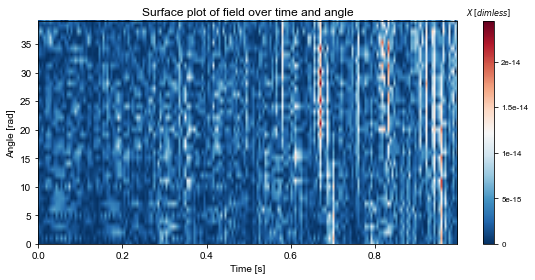

In [36]:
field_recovered = Field_recovered.values

a=np.abs(field - field_recovered)

Field_diff = DataTime(
    name="Field",
    symbol="X",
    unit="dimless",
    axes=[Time,Angle],
    values=a,
)

Field_diff.plot_3D_Data("time","angle",is_2D_view=True)


c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_3D.py:318: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_3D.py:318: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_4D.py:249: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, whic

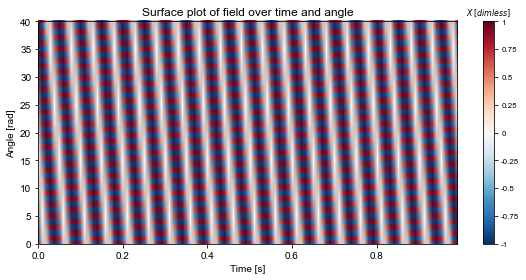

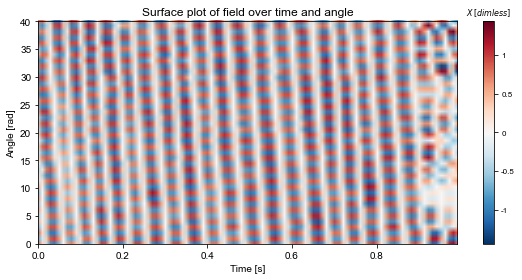

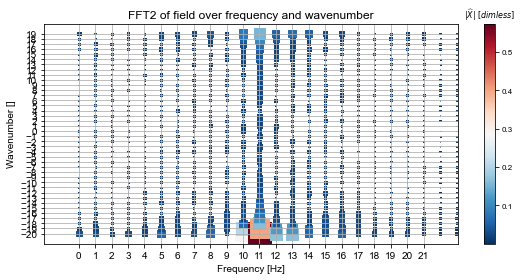

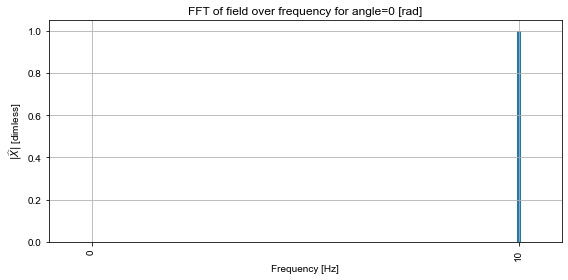

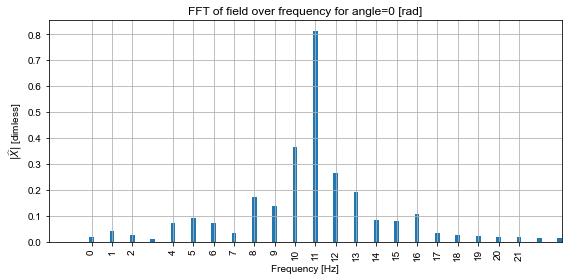

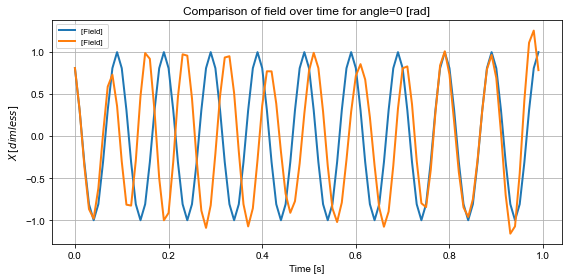

In [100]:
from numpy import ndarray, sin, pi, linspace, meshgrid, cos
    
def f_2d(theta: ndarray, t: ndarray) -> ndarray:
    """
    Create a 2D function with the following Fourier transform coefficients:
    - 2 at 0 Hz
    - 3 at 5 Hz
    - 4 at 12 Hz
    - 1 at 20 Hz
    Wavenumber:
    - 1 at 20 {°}
    - 3 at 50 {°}
    """
    return (
        0
        + 2 * cos(5 * 2 * pi * t + 1 * theta)
        + 1 * cos(9 * 2 * pi * t + 3 * theta)
    )
    
def f_2d(theta: ndarray, t: ndarray) -> ndarray:

    return (
        0
        + 1 * cos(10 * 2 * pi * t + 3 * theta)
    ) 
   
# Define the Time and Angle vector
n = 100

time = linspace(0,1,n,endpoint=False)
fs = time[1] - time[0]
Time = Data1D(name="time", unit="s", values=linspace(0,1,n,endpoint=False))
Angle = Data1D(name="angle", unit="{°}", values=linspace(0,40,40))

# Compute a grid of the space and the resulting field
time_coord, angle_coord = meshgrid(Time.get_values(), Angle.get_values())
field = f_2d(angle_coord, time_coord).T

field = field[::-1,:]

Field = DataTime(
    name="Field",
    symbol="X",
    unit="dimless",
    axes=[Time,Angle],
    values=field,
)

Field.plot_3D_Data("time","angle",is_2D_view=True)


# Undersample the Time axis with 50% of the samples
K = 0.9

from SciDataTool.Functions.omp import comp_undersampling
M, Time_under = comp_undersampling(K, Time)


# Compute a new grid and the resulting field
time_under_coord, angle_under_coord = meshgrid(Time_under.get_values(), Angle.get_values())
field_under = f_2d(angle_under_coord,time_under_coord).T

field_under = field_under[::-1,:]

Field_under = DataTime(
    name="Field",
    symbol="X",
    unit="dimless",
    axes=[Time_under,Angle],
    values=field_under,
)

Field_recovered = Field_under.orthogonal_mp(Time, n_coefs=14)

field_recovered = Field_recovered.values

Field_recovered.plot_3D_Data("time","angle",is_2D_view=True)

Field_recovered.plot_3D_Data("freqs","wavenumber",is_2D_view=True)

Field.plot_2D_Data("freqs","angle=0")
Field_recovered.plot_2D_Data("freqs","angle=0")

Field.plot_2D_Data("time","angle=0",data_list=[Field_recovered])

In [95]:
fs

0.01

c:\users\eomys\documents\eomys\repo\virtual_env\sample\src\scidatatool\SciDataTool\Functions\Plot\plot_2D.py:388: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


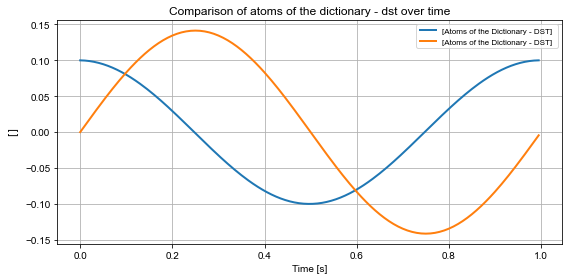

In [181]:
n = 200

f = 0.5 * np.arange(n)
t = np.linspace(0,1,n,endpoint=False)

DCT = cos(2 * pi * np.outer(f,t))
DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)

DST = sin(2 * pi * np.outer(f,t))
DST = spfft.idst(np.identity(n), type=4, norm='ortho', axis=0)

DST = sin(2 * pi * np.outer(f,t))
DST[:,0] = (1/5) * (1/np.sqrt(4)) * DST[:,0]
DST[:,1:] = (1/5) * (1/np.sqrt(2)) * DST[:,1:]

Dictionary = np.concatenate([DCT,DST],axis=1)

i = 2

axe_time = Data1D(
    name="time",
    values=t,
    )

atom_dct = DataTime(
    name="Atoms of the Dictionary - DST",
    axes=[axe_time],values=DCT[:,i],
    )
atom_dst = DataTime(
    name="Atoms of the Dictionary - DST",
    axes=[axe_time],values=DST[:,i],
    )

atom_dct.plot_2D_Data("time",data_list=[atom_dst])

In [183]:
n=200
DCT = spfft.idct(np.identity(n), type=2, norm='ortho', axis=0)


DCT[:,0] = (1/5) * (1/np.sqrt(4)) * DCT[:,0]

DCT[:,1:] = (1/5) * (1/np.sqrt(2)) * DCT[:,1:]
DST[:,0] = (1/5) * (1/np.sqrt(4)) * DST[:,0]

DST[:,1:] = (1/5) * (1/np.sqrt(2)) * DST[:,1:]




In [184]:
print(np.linalg.norm(DCT[:,99]))

print(np.linalg.norm(DST[:,29]))


0.14142135623730953
0.2
